In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"E:\3rdyear\2nd_sem\3200\datafiles\Emotion_classify_Data.csv")

In [3]:
dataset.head(5)

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [5]:
dataset.shape

(5937, 2)

In [6]:
x = dataset["Comment"]
y = dataset ["Emotion"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
dataset.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [27]:
vct = CountVectorizer()
x_vct= vct.fit_transform(x)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x_vct,y,test_size=0.2,random_state =42)

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
mul = MultinomialNB()
mul.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [32]:
mul.score(x_test,y_test)*100

89.39393939393939

In [33]:
y_pred = mul.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [35]:
g= confusion_matrix(y_test,y_pred)

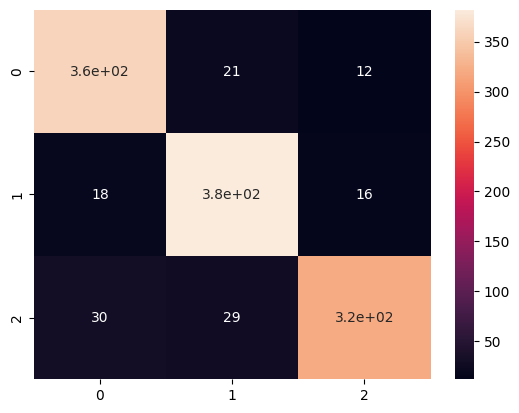

In [37]:
sns.heatmap(g,annot=True)
plt.show()

In [39]:
accuracy_score(y_test,y_pred)*100

89.39393939393939

In [50]:
precision_score(y_test,y_pred,average='weighted')*100

89.48937606091765

In [51]:
recall_score(y_test,y_pred,average='weighted')*100

89.39393939393939

In [56]:
f1_score(y_test, y_pred, average='weighted')*100

89.36893804699191

In [42]:
def predict_emotion(text):
    text_vector = vct.transform([text])
    return mul.predict(text_vector)[0]


In [48]:
print(predict_emotion("I feel devastated"))


fear
